In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
ROOM1:Zone Mean Air Temperature [C](TimeStep)

In [66]:
def data_gen(file):
    df=pd.read_csv(file)
    df2=df[['Date/Time','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)','ROOM1:Zone Air System Sensible Heating Energy [J](TimeStep)',
       'ROOM1:Zone Air System Sensible Cooling Energy [J](TimeStep) ']]
    df2['Month'] = df2['Date/Time'].apply(lambda x: x.split(' ')[1].split('/')[0])
    monthly_data = df2.groupby('Month').agg({
    'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)':'mean',
    'ROOM1:Zone Air System Sensible Heating Energy [J](TimeStep)':'sum',
    'ROOM1:Zone Air System Sensible Cooling Energy [J](TimeStep) ':'sum'
    }).reset_index()
    monthly_data.columns = ['Month', 'Mean Air Temperature (°C)', 'Total Heating Energy (J)', 'Total Cooling Energy (J)']
    return monthly_data

In [97]:
control = data_gen('shimla - control.csv')
rice = data_gen('shimla - rice.csv')
sugarcane = data_gen('shimla - sugarcane.csv')

C:\Users\91821\AppData\Local\Temp\ipykernel_292\3972248904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Date/Time'].apply(lambda x: x.split(' ')[1].split('/')[0])
C:\Users\91821\AppData\Local\Temp\ipykernel_292\3972248904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Date/Time'].apply(lambda x: x.split(' ')[1].split('/')[0])
C:\Users\91821\AppData\Local\Temp\ipykernel_292\3972248904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [69]:
rice

,Month,Mean Air Temperature (°C),Total Heating Energy (J),Total Cooling Energy (J)
0,01,12.550806,1.235408e+08,0.000000e+00
1,02,16.712946,1.469915e+07,0.000000e+00
2,03,22.196371,0.000000e+00,1.074201e+08
3,04,27.910417,0.000000e+00,4.728414e+08
4,05,30.926613,0.000000e+00,8.470235e+08
5,06,31.314861,0.000000e+00,8.946343e+08
6,07,29.735618,0.000000e+00,6.687199e+08
7,08,28.960753,0.000000e+00,5.544599e+08
8,09,28.679722,0.000000e+00,7.187900e+08
9,10,24.200538,0.000000e+00,4.739737e+08


In [98]:
df_merged = control.merge(rice,on='Month').merge(sugarcane,on='Month')

In [103]:
df_merged

,Month,Mean Air Temperature (°C)_x,Total Heating Energy (J)_x,Total Cooling Energy (J)_x,Mean Air Temperature (°C)_y,Total Heating Energy (J)_y,Total Cooling Energy (J)_y,Mean Air Temperature (°C),Total Heating Energy (J),Total Cooling Energy (J)
0,01,6.037097,3.342119e+09,0.000000e+00,6.037097,4.044745e+07,0.000000e+00,6.037097,7.654020e+08,0.000000e+00
1,02,9.246875,1.817823e+09,0.000000e+00,9.246875,4.739735e+05,0.000000e+00,9.246875,3.730444e+08,0.000000e+00
2,03,14.450538,4.446081e+08,0.000000e+00,14.450538,0.000000e+00,0.000000e+00,14.450538,1.453317e+07,0.000000e+00
3,04,17.678889,1.141911e+08,1.228851e+07,17.678889,0.000000e+00,8.389525e+06,17.678889,0.000000e+00,0.000000e+00
4,05,20.921505,1.876569e+05,1.879877e+08,20.921505,0.000000e+00,5.973501e+07,20.921505,0.000000e+00,1.727742e+06
5,06,21.797361,1.074093e+06,2.206564e+08,21.797361,0.000000e+00,6.992371e+07,21.797361,0.000000e+00,1.064637e+06
6,07,21.494086,0.000000e+00,9.383406e+07,21.494086,0.000000e+00,6.830515e+07,21.494086,0.000000e+00,5.711569e+06
7,08,21.431855,0.000000e+00,2.044179e+07,21.431855,0.000000e+00,6.123947e+07,21.431855,0.000000e+00,0.000000e+00
8,09,19.947778,0.000000e+00,1.302322e+07,19.947778,0.000000e+00,1.456993e+08,19.947778,0.000000e+00,1.868254e+05
9,10,16.609140,8.027204e+07,0.000000e+00,16.609140,0.000000e+00,2.280135e+08,16.609140,0.000000e+00,0.000000e+00


In [104]:
forplot = df_merged[:]

In [105]:
forplot = forplot.drop(["Mean Air Temperature (°C)_x", "Mean Air Temperature (°C)_y"], axis=1)

In [106]:
forplot.columns

Index(['Month', 'Total Heating Energy (J)_x', 'Total Cooling Energy (J)_x',
       'Total Heating Energy (J)_y', 'Total Cooling Energy (J)_y',
       'Mean Air Temperature (°C)', 'Total Heating Energy (J)',
       'Total Cooling Energy (J)'],
      dtype='object')

In [107]:
joule_columns = ['Total Heating Energy (J)_x', 'Total Cooling Energy (J)_x',
                           'Total Heating Energy (J)_y', 'Total Cooling Energy (J)_y',
                           'Total Heating Energy (J)', 'Total Cooling Energy (J)']
for col in joule_columns:
    if col in forplot.columns:
        forplot[col] = forplot[col] / (3.6 * 10**6)
        forplot.rename(columns={col: col.replace('(J)', '(kWh)')}, inplace=True) #rename the column

forplot

,Month,Total Heating Energy (kWh)_x,Total Cooling Energy (kWh)_x,Total Heating Energy (kWh)_y,Total Cooling Energy (kWh)_y,Mean Air Temperature (°C),Total Heating Energy (kWh),Total Cooling Energy (kWh)
0,01,928.366296,0.000000,11.235403,0.000000,6.037097,212.611654,0.000000
1,02,504.950727,0.000000,0.131659,0.000000,9.246875,103.623432,0.000000
2,03,123.502255,0.000000,0.000000,0.000000,14.450538,4.036990,0.000000
3,04,31.719751,3.413474,0.000000,2.330424,17.678889,0.000000,0.000000
4,05,0.052127,52.218799,0.000000,16.593057,20.921505,0.000000,0.479928
5,06,0.298359,61.293457,0.000000,19.423253,21.797361,0.000000,0.295732
6,07,0.000000,26.065016,0.000000,18.973654,21.494086,0.000000,1.586547
7,08,0.000000,5.678274,0.000000,17.010963,21.431855,0.000000,0.000000
8,09,0.000000,3.617560,0.000000,40.472023,19.947778,0.000000,0.051896
9,10,22.297790,0.000000,0.000000,63.337085,16.609140,0.000000,0.000000


In [108]:
forplot.columns

Index(['Month', 'Total Heating Energy (kWh)_x', 'Total Cooling Energy (kWh)_x',
       'Total Heating Energy (kWh)_y', 'Total Cooling Energy (kWh)_y',
       'Mean Air Temperature (°C)', 'Total Heating Energy (kWh)',
       'Total Cooling Energy (kWh)'],
      dtype='object')

In [109]:
rename_mapping = {
      'Total Heating Energy (kWh)_x': 'Total Heating Energy (kWh) (Clay Brick)',
      'Total Cooling Energy (kWh)_x': 'Total Cooling Energy (kWh) (Clay Brick)',
      'Total Heating Energy (kWh)_y': 'Total Heating Energy (kWh) (Rice Cork)',
      'Total Cooling Energy (kWh)_y': 'Total Cooling Energy (kWh) (Rice Cork)',
      'Total Heating Energy (kWh)': 'Total Heating Energy (kWh) (Bagasse Ash Brick)',
      'Total Cooling Energy (kWh)': 'Total Cooling Energy (kWh) (Bagasse Ash Brick)'
  }
forplot.rename(columns=rename_mapping, inplace=True)

In [110]:
forplot

,Month,Total Heating Energy (kWh) (Clay Brick),Total Cooling Energy (kWh) (Clay Brick),Total Heating Energy (kWh) (Rice Cork),Total Cooling Energy (kWh) (Rice Cork),Mean Air Temperature (°C),Total Heating Energy (kWh) (Bagasse Ash Brick),Total Cooling Energy (kWh) (Bagasse Ash Brick)
0,01,928.366296,0.000000,11.235403,0.000000,6.037097,212.611654,0.000000
1,02,504.950727,0.000000,0.131659,0.000000,9.246875,103.623432,0.000000
2,03,123.502255,0.000000,0.000000,0.000000,14.450538,4.036990,0.000000
3,04,31.719751,3.413474,0.000000,2.330424,17.678889,0.000000,0.000000
4,05,0.052127,52.218799,0.000000,16.593057,20.921505,0.000000,0.479928
5,06,0.298359,61.293457,0.000000,19.423253,21.797361,0.000000,0.295732
6,07,0.000000,26.065016,0.000000,18.973654,21.494086,0.000000,1.586547
7,08,0.000000,5.678274,0.000000,17.010963,21.431855,0.000000,0.000000
8,09,0.000000,3.617560,0.000000,40.472023,19.947778,0.000000,0.051896
9,10,22.297790,0.000000,0.000000,63.337085,16.609140,0.000000,0.000000


In [111]:
forplot.columns

Index(['Month', 'Total Heating Energy (kWh) (Clay Brick)',
       'Total Cooling Energy (kWh) (Clay Brick)',
       'Total Heating Energy (kWh) (Rice Cork)',
       'Total Cooling Energy (kWh) (Rice Cork)', 'Mean Air Temperature (°C)',
       'Total Heating Energy (kWh) (Bagasse Ash Brick)',
       'Total Cooling Energy (kWh) (Bagasse Ash Brick)'],
      dtype='object')

KeyError: 'Clay Brick Heating'

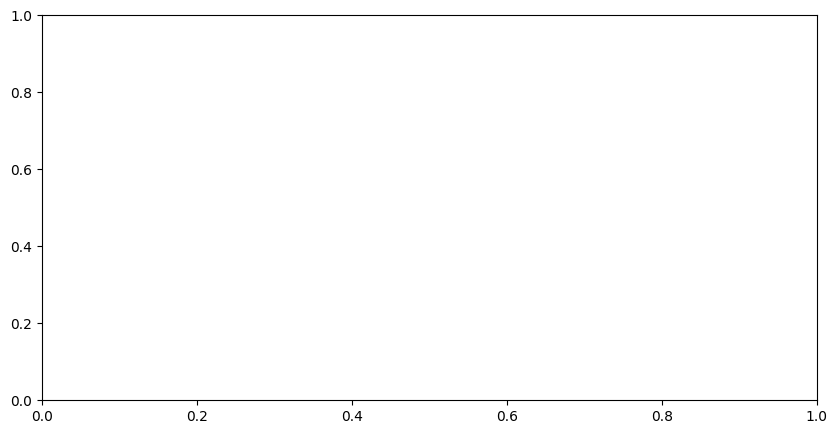

In [80]:
x = np.arange(len(forplot["Month"]))
width = 0.25  # width of bars

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
ax.bar(x - width, df["Clay Brick Heating"] + df["Clay Brick Cooling"], width, label='Clay Brick (Control)', color='orange')
ax.bar(x, df["Rice Cork Heating"] + df["Rice Cork Cooling"], width, label='Rice Cork Wall', color='red')
ax.bar(x + width, df["Bagasse Ash Heating"] + df["Bagasse Ash Cooling"], width, label='Bagasse Ash Brick', color='magenta')

# Labels, titles, and formatting
ax.set_xlabel("Month")
ax.set_ylabel("Total Energy Load (kWh)")
ax.set_title("Monthly Total Energy Load Comparison")
ax.set_xticks(x)
ax.set_xticklabels(df["Month"])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [30]:
import numpy as np

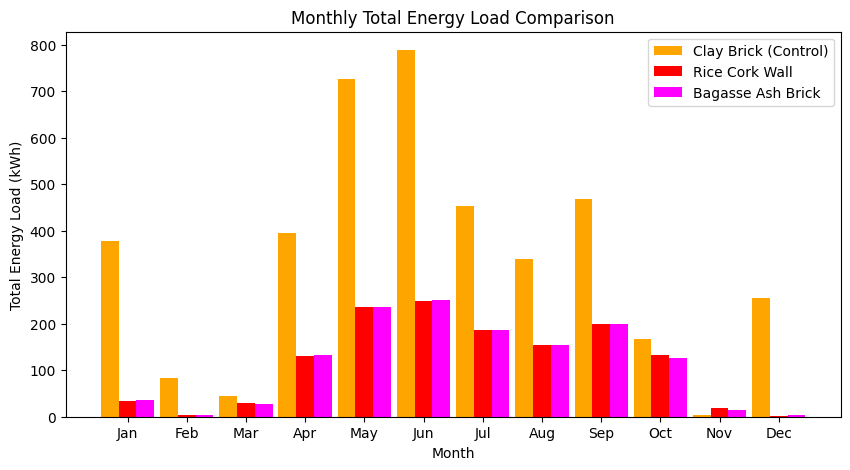

In [81]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Extract data from the existing DataFrame
clay_brick = forplot[['Total Heating Energy (kWh) (Clay Brick)', 'Total Cooling Energy (kWh) (Clay Brick)']].sum(axis=1)
rice_cork = forplot[['Total Heating Energy (kWh) (Rice Cork)', 'Total Cooling Energy (kWh) (Rice Cork)']].sum(axis=1)
bagasse_ash = forplot[['Total Heating Energy (kWh) (Bagasse Ash Brick)', 'Total Cooling Energy (kWh) (Bagasse Ash Brick)']].sum(axis=1)

x = np.arange(len(months))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, clay_brick, width, label='Clay Brick (Control)', color='orange')
rects2 = ax.bar(x, rice_cork, width, label='Rice Cork Wall', color='red')
rects3 = ax.bar(x + width, bagasse_ash, width, label='Bagasse Ash Brick', color='magenta')

# Labels, title, and custom x-axis tick labels
ax.set_xlabel('Month')
ax.set_ylabel('Total Energy Load (kWh)')
ax.set_title('Monthly Total Energy Load Comparison')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

# Show the plot
plt.show()

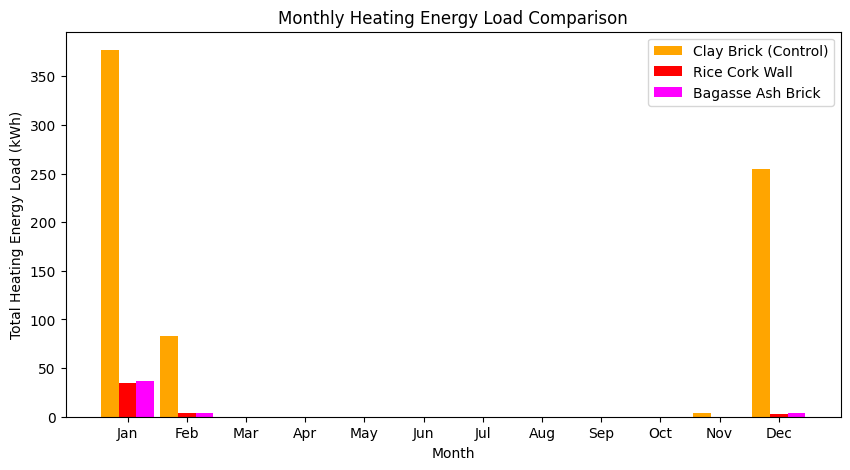

In [82]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Extract data from the existing DataFrame
clay_brick = forplot['Total Heating Energy (kWh) (Clay Brick)']
rice_cork = forplot['Total Heating Energy (kWh) (Rice Cork)']
bagasse_ash = forplot['Total Heating Energy (kWh) (Bagasse Ash Brick)']

x = np.arange(len(months))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, clay_brick, width, label='Clay Brick (Control)', color='orange')
rects2 = ax.bar(x, rice_cork, width, label='Rice Cork Wall', color='red')
rects3 = ax.bar(x + width, bagasse_ash, width, label='Bagasse Ash Brick', color='magenta')

# Labels, title, and custom x-axis tick labels
ax.set_xlabel('Month')
ax.set_ylabel('Total Heating Energy Load (kWh)')
ax.set_title('Monthly Heating Energy Load Comparison')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

# Show the plot
plt.show()

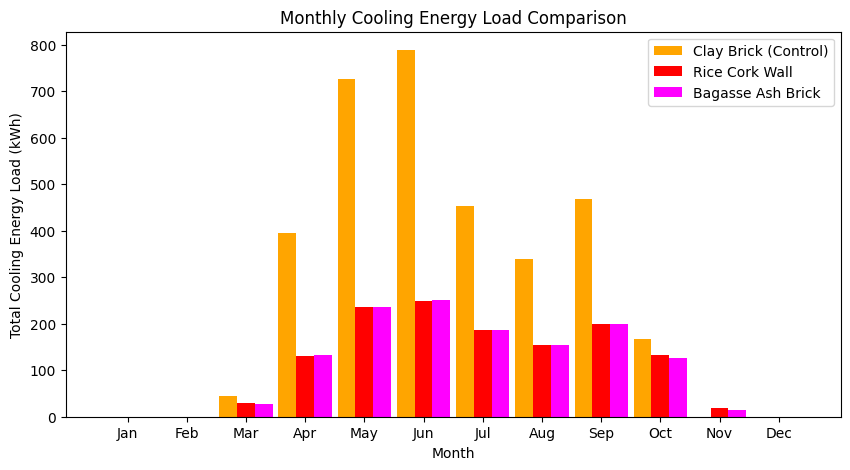

In [83]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Extract data from the existing DataFrame
clay_brick = forplot['Total Cooling Energy (kWh) (Clay Brick)']
rice_cork = forplot['Total Cooling Energy (kWh) (Rice Cork)']
bagasse_ash = forplot['Total Cooling Energy (kWh) (Bagasse Ash Brick)']

x = np.arange(len(months))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, clay_brick, width, label='Clay Brick (Control)', color='orange')
rects2 = ax.bar(x, rice_cork, width, label='Rice Cork Wall', color='red')
rects3 = ax.bar(x + width, bagasse_ash, width, label='Bagasse Ash Brick', color='magenta')

# Labels, title, and custom x-axis tick labels
ax.set_xlabel('Month')
ax.set_ylabel('Total Cooling Energy Load (kWh)')
ax.set_title('Monthly Cooling Energy Load Comparison')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

# Show the plot
plt.show()

In [84]:
forplot

,Month,Total Heating Energy (kWh) (Clay Brick),Total Cooling Energy (kWh) (Clay Brick),Total Heating Energy (kWh) (Rice Cork),Total Cooling Energy (kWh) (Rice Cork),Mean Air Temperature (°C),Total Heating Energy (kWh) (Bagasse Ash Brick),Total Cooling Energy (kWh) (Bagasse Ash Brick)
0,01,376.968258,0.000000,34.316876,0.000000,12.550806,36.787181,0.000000
1,02,82.633865,0.373489,4.083097,0.000000,16.712946,3.975989,0.000000
2,03,0.000000,43.768222,0.000000,29.838915,22.196371,0.000000,26.679700
3,04,0.000000,394.193549,0.000000,131.344825,27.910417,0.000000,132.619801
4,05,0.000000,726.381359,0.000000,235.284293,30.926613,0.000000,235.365478
5,06,0.000000,788.301200,0.000000,248.509520,31.314861,0.000000,250.212469
6,07,0.000000,453.539881,0.000000,185.755540,29.735618,0.000000,185.571968
7,08,0.000000,339.393002,0.000000,154.016650,28.960753,0.000000,154.238865
8,09,0.000000,468.656954,0.000000,199.663884,28.679722,0.000000,199.656113
9,10,0.000000,166.933296,0.000000,131.659365,24.200538,0.000000,127.103473


In [85]:
forplot.sum()

Month                                             010203040506070809101112
Total Heating Energy (kWh) (Clay Brick)                         717.761913
Total Cooling Energy (kWh) (Clay Brick)                        3381.562736
Total Heating Energy (kWh) (Rice Cork)                           41.021805
Total Cooling Energy (kWh) (Rice Cork)                         1334.173577
Mean Air Temperature (°C)                                       286.358345
Total Heating Energy (kWh) (Bagasse Ash Brick)                   44.399639
Total Cooling Energy (kWh) (Bagasse Ash Brick)                 1325.043378
dtype: object

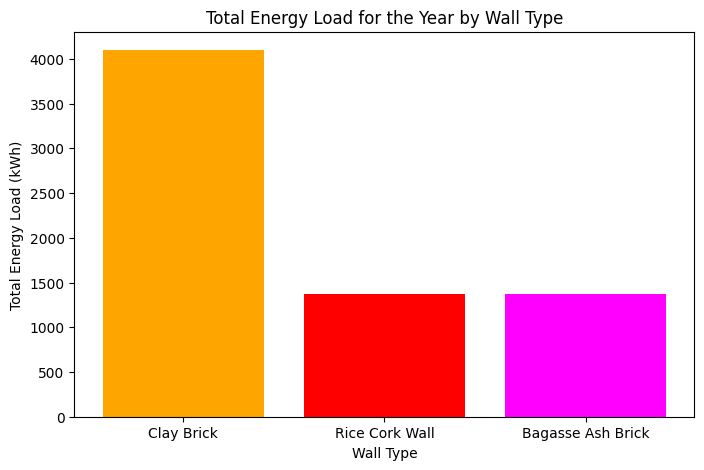

In [86]:
clay_brick_total = forplot[['Total Heating Energy (kWh) (Clay Brick)', 'Total Cooling Energy (kWh) (Clay Brick)']].sum().sum()
rice_cork_total = forplot[['Total Heating Energy (kWh) (Rice Cork)', 'Total Cooling Energy (kWh) (Rice Cork)']].sum().sum()
bagasse_ash_total = forplot[['Total Heating Energy (kWh) (Bagasse Ash Brick)', 'Total Cooling Energy (kWh) (Bagasse Ash Brick)']].sum().sum()

# Wall types and their corresponding total energy loads
wall_types = ['Clay Brick', 'Rice Cork Wall', 'Bagasse Ash Brick']
total_energy = [clay_brick_total, rice_cork_total, bagasse_ash_total]
colors = ['orange', 'red', 'magenta']

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(wall_types, total_energy, color=colors)

# Labels and title
ax.set_xlabel('Wall Type')
ax.set_ylabel('Total Energy Load (kWh)')
ax.set_title('Total Energy Load for the Year by Wall Type')

# Show the plot
plt.show()


In [43]:
control

,Month,Mean Air Temperature (°C),Total Heating Energy (J),Total Cooling Energy (J)
0,01,6.037097,3.342119e+09,0.000000e+00
1,02,9.246875,1.817823e+09,0.000000e+00
2,03,14.450538,4.446081e+08,0.000000e+00
3,04,17.678889,1.141911e+08,1.228851e+07
4,05,20.921505,1.876569e+05,1.879877e+08
5,06,21.797361,1.074093e+06,2.206564e+08
6,07,21.494086,0.000000e+00,9.383406e+07
7,08,21.431855,0.000000e+00,2.044179e+07
8,09,19.947778,0.000000e+00,1.302322e+07
9,10,16.609140,8.027204e+07,0.000000e+00


In [99]:
df = pd.read_csv("shimla - control.csv")
df1 = pd.read_csv("shimla - rice.csv")
df2 = pd.read_csv("shimla - sugarcane.csv")

In [7]:
df_merged.to_excel('df_merged.xlsx',index=False)

In [100]:
df10 = pd.DataFrame()

In [101]:
df10["Outside Temp"] = df["Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)"]
df10["Inside control temp"] = df["ROOM1:Zone Mean Air Temperature [C](TimeStep)"]
df10["Inside rice temp"] = df1["ROOM1:Zone Mean Air Temperature [C](TimeStep)"]
df10["Inside sugarcane temp"] = df2["ROOM1:Zone Mean Air Temperature [C](TimeStep)"]

In [90]:
df10

,Outside Temp,Inside control temp,Inside rice temp,Inside sugarcane temp
0,8.1,21.000000,21.000000,21.000000
1,6.9,21.000000,21.000000,21.000000
2,6.8,21.000000,21.000000,21.000000
3,5.7,21.000000,21.000000,21.000000
4,5.9,21.000000,21.000000,21.000000
...,...,...,...,...
8755,14.6,21.000000,22.194445,22.114733
8756,13.6,21.003714,22.125677,22.081547
8757,13.6,21.000015,22.062948,22.043950
8758,11.9,21.000000,21.740139,21.745643


In [91]:
df10.columns

Index(['Outside Temp', 'Inside control temp', 'Inside rice temp',
       'Inside sugarcane temp'],
      dtype='object')

In [92]:
df10

,Outside Temp,Inside control temp,Inside rice temp,Inside sugarcane temp
0,8.1,21.000000,21.000000,21.000000
1,6.9,21.000000,21.000000,21.000000
2,6.8,21.000000,21.000000,21.000000
3,5.7,21.000000,21.000000,21.000000
4,5.9,21.000000,21.000000,21.000000
...,...,...,...,...
8755,14.6,21.000000,22.194445,22.114733
8756,13.6,21.003714,22.125677,22.081547
8757,13.6,21.000015,22.062948,22.043950
8758,11.9,21.000000,21.740139,21.745643


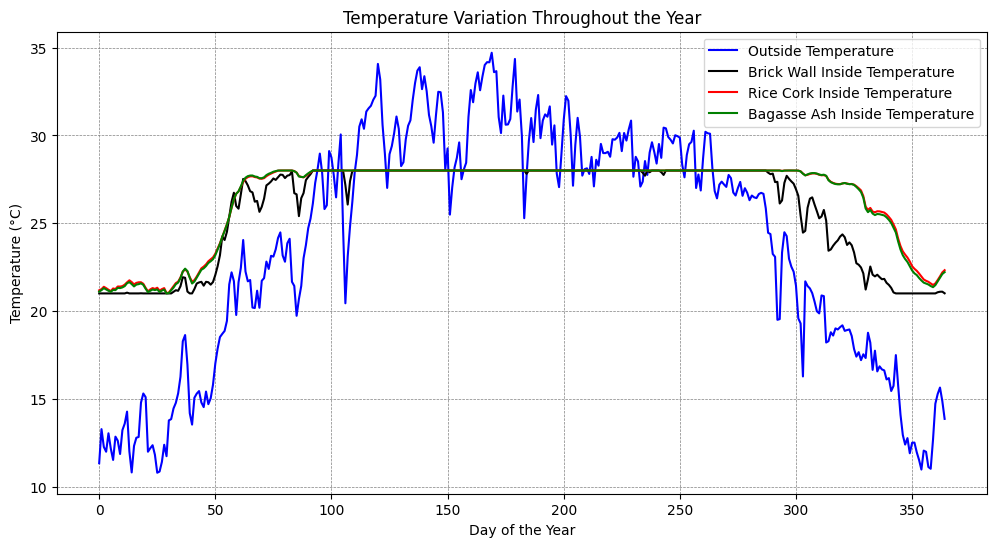

In [95]:
df10['Day'] = np.arange(len(df10)) // 24  # Group by days
daily_avg = df10.groupby('Day').mean()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_avg.index, daily_avg['Outside Temp'], label='Outside Temperature', color='blue')
ax.plot(daily_avg.index, daily_avg['Inside control temp'], label='Brick Wall Inside Temperature', color='black')
ax.plot(daily_avg.index, daily_avg['Inside rice temp'], label='Rice Cork Inside Temperature', color='red')
ax.plot(daily_avg.index, daily_avg['Inside sugarcane temp'], label='Bagasse Ash Inside Temperature', color='green')

ax.set_xlabel('Day of the Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Variation Throughout the Year')
ax.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.show()

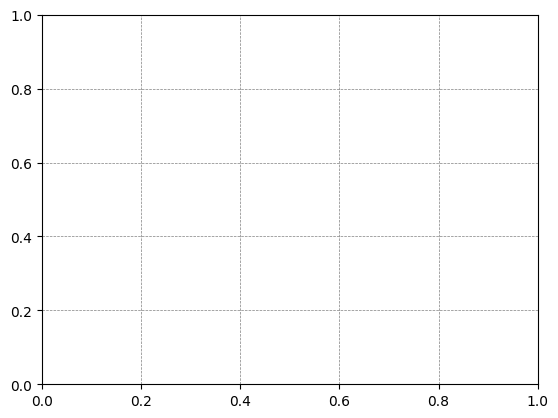

In [94]:
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)


C:\Users\91821\AppData\Local\Temp\ipykernel_292\650196014.py:22: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=data, x='Month', y='Total Energy Load (kWh)', hue='Wall Type', palette=colors)


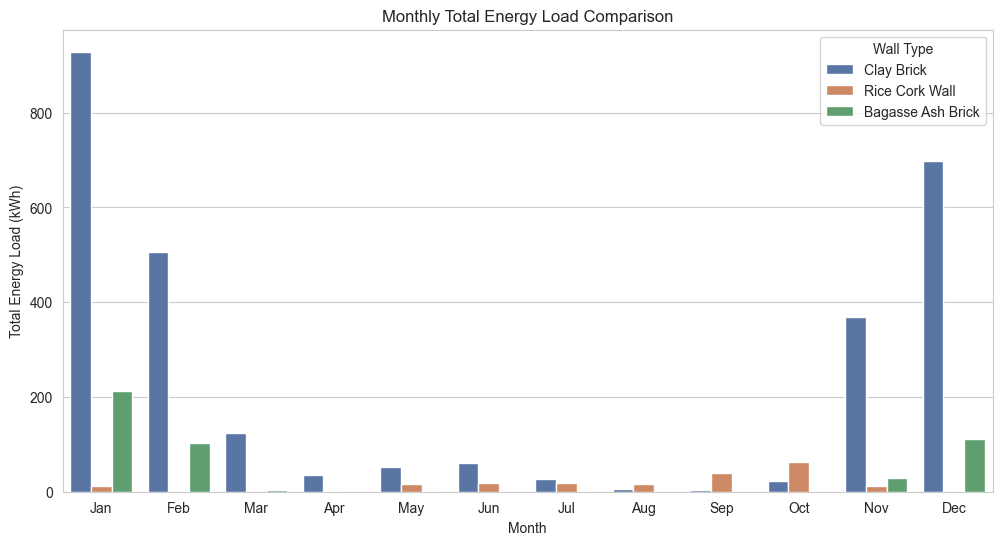

C:\Users\91821\AppData\Local\Temp\ipykernel_292\650196014.py:39: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=data, x='Month', y='Total Heating Energy Load (kWh)', hue='Wall Type', palette=colors)


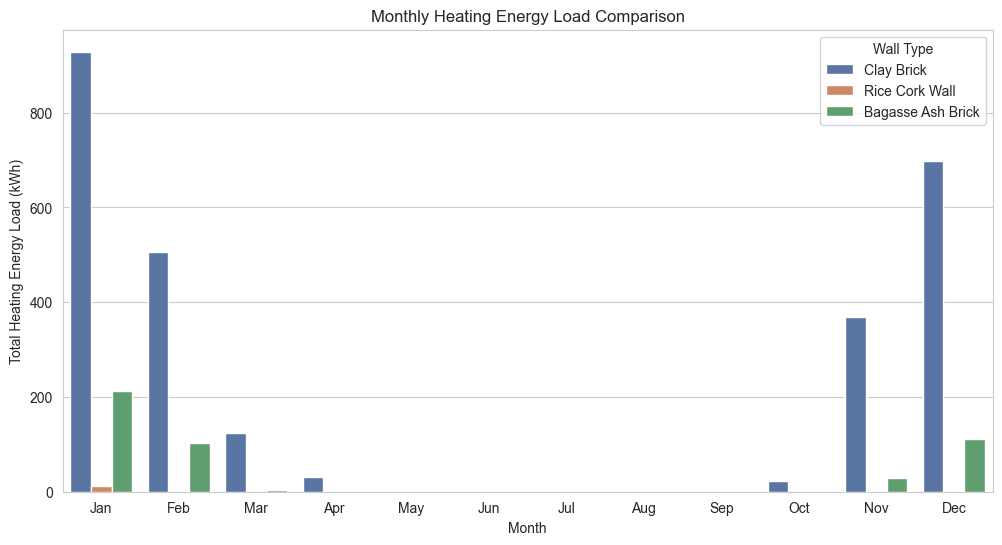

C:\Users\91821\AppData\Local\Temp\ipykernel_292\650196014.py:56: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=data, x='Month', y='Total Cooling Energy Load (kWh)', hue='Wall Type', palette=colors)


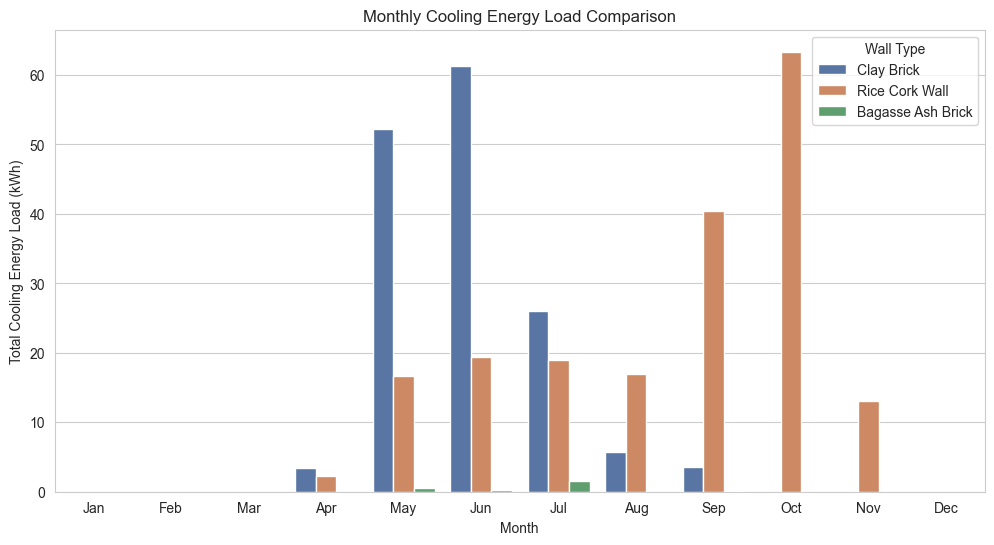

C:\Users\91821\AppData\Local\Temp\ipykernel_292\650196014.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Wall Type', y='Total Energy Load (kWh)', palette=colors)
C:\Users\91821\AppData\Local\Temp\ipykernel_292\650196014.py:72: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=data, x='Wall Type', y='Total Energy Load (kWh)', palette=colors)


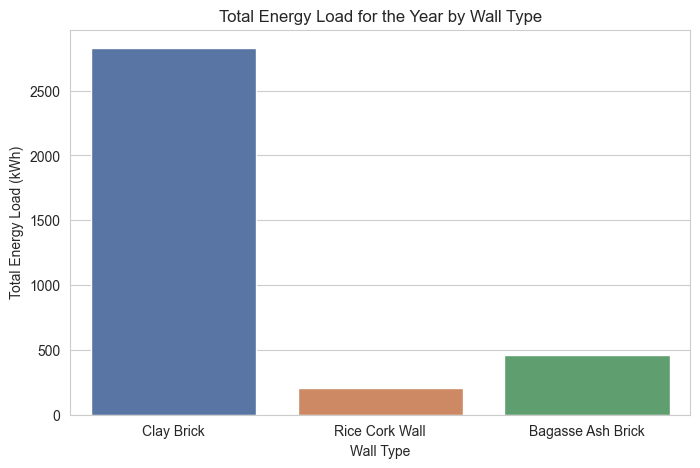

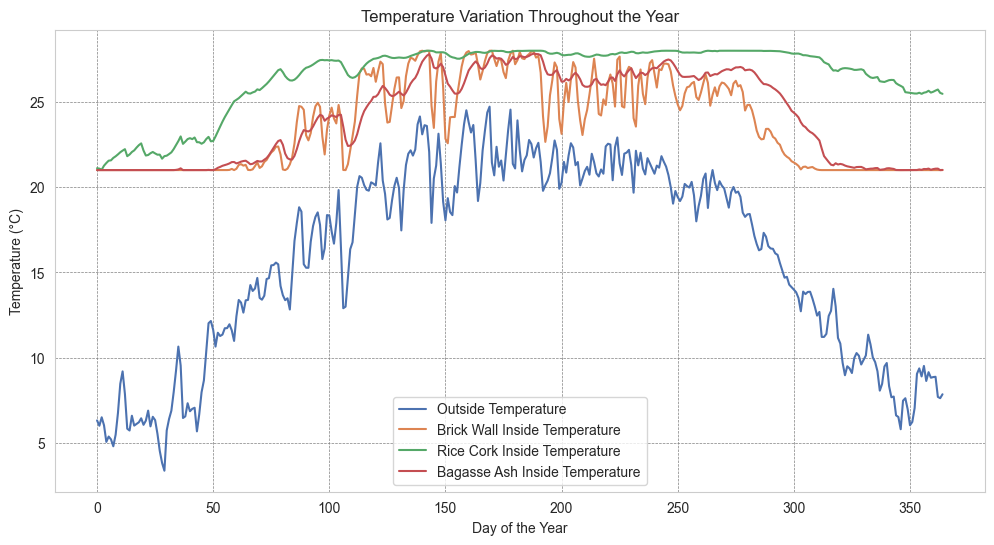

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")
colors = sns.color_palette("deep")

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Extract data from the existing DataFrame
clay_brick = forplot[['Total Heating Energy (kWh) (Clay Brick)', 'Total Cooling Energy (kWh) (Clay Brick)']].sum(axis=1)
rice_cork = forplot[['Total Heating Energy (kWh) (Rice Cork)', 'Total Cooling Energy (kWh) (Rice Cork)']].sum(axis=1)
bagasse_ash = forplot[['Total Heating Energy (kWh) (Bagasse Ash Brick)', 'Total Cooling Energy (kWh) (Bagasse Ash Brick)']].sum(axis=1)

data = pd.DataFrame({'Month': months * 3,
                     'Total Energy Load (kWh)': np.concatenate([clay_brick, rice_cork, bagasse_ash]),
                     'Wall Type': ['Clay Brick'] * 12 + ['Rice Cork Wall'] * 12 + ['Bagasse Ash Brick'] * 12})

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Month', y='Total Energy Load (kWh)', hue='Wall Type', palette=colors)
plt.title('Monthly Total Energy Load Comparison')
plt.xlabel('Month')
plt.ylabel('Total Energy Load (kWh)')
plt.legend(title='Wall Type')
plt.show()

# Heating Energy Plot
clay_brick = forplot['Total Heating Energy (kWh) (Clay Brick)']
rice_cork = forplot['Total Heating Energy (kWh) (Rice Cork)']
bagasse_ash = forplot['Total Heating Energy (kWh) (Bagasse Ash Brick)']

data = pd.DataFrame({'Month': months * 3,
                     'Total Heating Energy Load (kWh)': np.concatenate([clay_brick, rice_cork, bagasse_ash]),
                     'Wall Type': ['Clay Brick'] * 12 + ['Rice Cork Wall'] * 12 + ['Bagasse Ash Brick'] * 12})

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Month', y='Total Heating Energy Load (kWh)', hue='Wall Type', palette=colors)
plt.title('Monthly Heating Energy Load Comparison')
plt.xlabel('Month')
plt.ylabel('Total Heating Energy Load (kWh)')
plt.legend(title='Wall Type')
plt.show()

# Cooling Energy Plot
clay_brick = forplot['Total Cooling Energy (kWh) (Clay Brick)']
rice_cork = forplot['Total Cooling Energy (kWh) (Rice Cork)']
bagasse_ash = forplot['Total Cooling Energy (kWh) (Bagasse Ash Brick)']

data = pd.DataFrame({'Month': months * 3,
                     'Total Cooling Energy Load (kWh)': np.concatenate([clay_brick, rice_cork, bagasse_ash]),
                     'Wall Type': ['Clay Brick'] * 12 + ['Rice Cork Wall'] * 12 + ['Bagasse Ash Brick'] * 12})

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Month', y='Total Cooling Energy Load (kWh)', hue='Wall Type', palette=colors)
plt.title('Monthly Cooling Energy Load Comparison')
plt.xlabel('Month')
plt.ylabel('Total Cooling Energy Load (kWh)')
plt.legend(title='Wall Type')
plt.show()

# Total Energy Load by Wall Type
clay_brick_total = forplot[['Total Heating Energy (kWh) (Clay Brick)', 'Total Cooling Energy (kWh) (Clay Brick)']].sum().sum()
rice_cork_total = forplot[['Total Heating Energy (kWh) (Rice Cork)', 'Total Cooling Energy (kWh) (Rice Cork)']].sum().sum()
bagasse_ash_total = forplot[['Total Heating Energy (kWh) (Bagasse Ash Brick)', 'Total Cooling Energy (kWh) (Bagasse Ash Brick)']].sum().sum()

data = pd.DataFrame({'Wall Type': ['Clay Brick', 'Rice Cork Wall', 'Bagasse Ash Brick'],
                     'Total Energy Load (kWh)': [clay_brick_total, rice_cork_total, bagasse_ash_total]})

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Wall Type', y='Total Energy Load (kWh)', palette=colors)
plt.title('Total Energy Load for the Year by Wall Type')
plt.xlabel('Wall Type')
plt.ylabel('Total Energy Load (kWh)')
plt.show()

# Temperature Variation Plot
df10['Day'] = np.arange(len(df10)) // 24  # Group by days
daily_avg = df10.groupby('Day').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg, x=daily_avg.index, y='Outside Temp', label='Outside Temperature', color=colors[0])
sns.lineplot(data=daily_avg, x=daily_avg.index, y='Inside control temp', label='Brick Wall Inside Temperature', color=colors[1])
sns.lineplot(data=daily_avg, x=daily_avg.index, y='Inside rice temp', label='Rice Cork Inside Temperature', color=colors[2])
sns.lineplot(data=daily_avg, x=daily_avg.index, y='Inside sugarcane temp', label='Bagasse Ash Inside Temperature', color=colors[3])

plt.title('Temperature Variation Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.show()